<div style="font-family: Arial, Helvetica, sans-serif;">
    <div style="display: flex;padding-top: 20px">
        <div><strong>Course:</strong> Introduction to Data Science</div>
    </div>
    <div style="display: flex;padding-top: 20px">
        <div style="padding-right: 10px;"><strong>Class:</strong> KHDL1</div>
        <div></div>
    </div>
    <div style="display: flex;padding-top: 20px">
        <div style="padding-right: 10px;"><strong>Group:</strong> 11 - HAHA</div>
    </div>
    <div>
        <div style="display: flex;padding-top: 20px">
            <div style="padding-right: 10px;"><strong>Members:</strong></div>
            <div></div>
        </div>
        <table style="font-size: 15px; display:flex;padding-top: 20px">
            <tr>
                <th>No.</th>
                <th>Student ID</th>
                <th>Name</th>
            </tr>
            <tr>
                <td>1</td>
                <td>22127008</td>
                <td style="text-align:left;">Đặng Châu Anh</td>
            </tr>
            <tr>
                <td>2</td>
                <td>22127014</td>
                <td style="text-align:left;">Nguyễn Kim Anh</td>
            </tr>
            <tr>
                <td>3</td>
                <td>22127147</td>
                <td style="text-align:left;">Đỗ Minh Huy</td>
            </tr>
            <tr>
                <td>4</td>
                <td>22127170</td>
                <td style="text-align:left;">Trần Dịu Huyền</td>
            </tr>
        </table>
    </div>
    <div style="font-size: 25px ;font-weight: 800; text-align: center;padding-top: 20px;">FINAL PROJECT</div>
    <div style="font-size: 20px ;font-weight: 800; text-align: center;padding-top: 20px;">SPOTIFY 2024 REWIND - DATA EXPLORATION</div>
</div>

# **Data Exploration**
## **Import libraries**

In [42]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import re

## **Read data from csv data files**

Read data from 9 csv data files in folder `./Data` into a DataFrame.

Each file corresponds to a different month, and we assign a `month` column to indicate the respective month for each file.

In [43]:
# Directory path containing CSV files
path = './Data'
all_files = glob.glob(f"{path}/*.csv")

# Initialize the month variable and list to store DataFrame
month = 1
df_month = []

# Read each CSV file and assign the corresponding month
for file in all_files:
    df = pd.read_csv(file)
    df['month'] = month
    df_month.append(df)
    month += 1

# Combine all DataFrames into a single DataFrame
data = pd.concat(df_month, ignore_index=True)
data

,rank,uri,artist_names,track_name,source,peak_rank,previous_rank,weeks_on_chart,streams,month
0,1,spotify:track:2HRgqmZQC0MC7GeNuDIXHN,"Jung Kook, Latto",Seven (feat. Latto) (Explicit Ver.),BIGHIT MUSIC,1,1,29,1178606,1
1,2,spotify:track:4qYfRfSxsmhJ1WMaywtLyI,"Wren Evans, itsnk",Từng Quen,Universal Music Indochina,1,2,14,1087520,1
2,3,spotify:track:0X28PqBpbQhWdi4usYw0w5,"Wren Evans, itsnk",Tò Te Tí,Universal Music Indochina,3,4,7,1036739,1
3,4,spotify:track:1khMN4Adfi3LrZvxOq4YM5,"VSOUL, RPT MCK, Obito, Ronboogz, Boyzed","Buồn Hay Vui (feat. RPT MCK, Obito, Ronboogz &...",12 trái lê,3,5,6,919584,1
4,5,spotify:track:1bG6Q8sR8jda7ryI365y8o,"Vũ., Dear Jane",Những Lời Hứa Bỏ Quên,WM Vietnam,1,3,7,856107,1
...,...,...,...,...,...,...,...,...,...,...
1995,196,spotify:track:7sZgr8RsXkDwkmiQok691a,Thịnh Suy,Mai Mình Xa,InQ International,85,187,28,145969,10
1996,197,spotify:track:2M2nM9t0YQoXMTnFH8AXBu,"Huỳnh Tú, Andiez",Đường Một Chiều,Huỳnh Tú,114,191,67,145160,10
1997,198,spotify:track:45Mswno1F7FoZkcmQkp7fi,Wren Evans,Thích Em Hơi Nhiều,Universal Music Indochina,1,-1,168,145003,10
1998,199,spotify:track:23ep27rDA9gklIzuJ6qzRD,Dương Domic,Yêu Em 2 Ngày,DAO Entertainment,174,-1,5,143566,10


### **Overview of dataset**

In this section, we will explore the structure of the dataset by:

- Checking the number of rows and columns to confirm that the dataset has the expected structure.

In [44]:
print(f"Number of rows: {data.shape[0]}")
print(f"Number of columns: {data.shape[1]}")

Number of rows: 2000
Number of columns: 10


- Reviewing the data types of each column to ensure they are appropriate (e.g., numerical columns are in integer/float format, categorical columns are in string/object format). This is important for later processing and analysis.

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   rank            2000 non-null   int64 
 1   uri             2000 non-null   object
 2   artist_names    2000 non-null   object
 3   track_name      2000 non-null   object
 4   source          2000 non-null   object
 5   peak_rank       2000 non-null   int64 
 6   previous_rank   2000 non-null   int64 
 7   weeks_on_chart  2000 non-null   int64 
 8   streams         2000 non-null   int64 
 9   month           2000 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 156.4+ KB


- Understanding the meaning of each column in the dataset:

    Column	Description
    - `rank`	Position of the track on the chart in that week
    - `uri`	Unique identifier for the track on Spotify
    - `artist_names`	Name(s) of the artist(s)
    - `track_name`	Name of the track
    - `source`	Record label or distributor
    - `peak_rank`	Highest position the track has reached on the chart
    - `previous_rank`	Position of the track in the previous week
    - `weeks_on_chart`	Number of weeks the track has been on the chart
    - `streams`	Number of times the track was streamed that week
    - `month`	Month identifier (added manually)

- Identifying any missing values or duplicate rows is essential for data quality assurance. This step allows us to handle incomplete data or remove unnecessary duplicates, ensuring a clean dataset.

In [46]:
print("Missing values per column:")
print(data.isnull().sum())

print("Number of duplicate rows:", data.duplicated().sum())

Missing values per column:
rank              0
uri               0
artist_names      0
track_name        0
source            0
peak_rank         0
previous_rank     0
weeks_on_chart    0
streams           0
month             0
dtype: int64
Number of duplicate rows: 0


- Besides, for categorical columns like `artist_names`, `track_name`, and `source`, we examine the number of unique values. This helps in understanding the diversity of entries, especially for artist and track names, and checks for consistency in source names.

In [47]:
print("Unique values per categorical column:")
for col in ['artist_names', 'track_name', 'source']:
    print(f"{col}: {data[col].nunique()} unique values")

Unique values per categorical column:
artist_names: 314 unique values
track_name: 441 unique values
source: 115 unique values


### **Exploratory Data Analysis (EDA)**
In this section, we perform a more in-depth analysis of the dataset to uncover patterns, distributions, and relationships between variables.

First, we view summary statistics for all numeric columns to understand basic patterns such as mean, median, min, and max values.

In [48]:
data.describe()

,rank,peak_rank,previous_rank,weeks_on_chart,streams,month
count,2000.000000,2000.000000,2000.000000,2000.000000,2.000000e+03,2000.000
mean,100.500000,32.300000,89.140500,71.844500,2.617987e+05,5.500
std,57.748744,40.155264,59.095515,68.974655,2.556539e+05,2.873
min,1.000000,1.000000,-1.000000,1.000000,1.111390e+05,1.000
25%,50.750000,4.000000,37.000000,17.000000,1.466748e+05,3.000
50%,100.500000,13.000000,88.000000,49.000000,1.891510e+05,5.500
75%,150.250000,49.250000,139.000000,107.000000,2.852210e+05,8.000
max,200.000000,200.000000,200.000000,343.000000,4.066056e+06,10.000


Outliers analysis

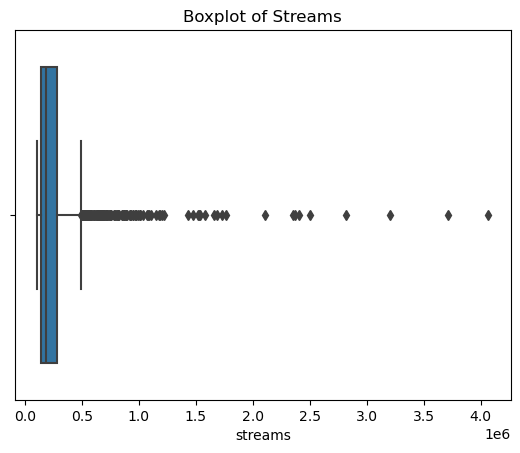

Outliers in streams:
                                             track_name  streams
0                   Seven (feat. Latto) (Explicit Ver.)  1178606
1                                             Từng Quen  1087520
2                                              Tò Te Tí  1036739
3     Buồn Hay Vui (feat. RPT MCK, Obito, Ronboogz &...   919584
4                                 Những Lời Hứa Bỏ Quên   856107
...                                                 ...      ...
1824  TÌNH ĐẦU QUÁ CHÉN (feat. Quang Hùng MasterD, N...   527780
1825                                             Mantra   526029
1826  NGÁO NGƠ (feat. HIEUTHUHAI, ERIK, Anh Tú Atus,...   525817
1827                                            MỘNG YU   522406
1828                          Hẹn Gặp Em Dưới Ánh Trăng   506833

[147 rows x 2 columns]


In [49]:
sns.boxplot(x=data['streams'])
plt.title('Boxplot of Streams')
plt.show()

# Calculate IQR for `streams` 
Q1 = data['streams'].quantile(0.25)
Q3 = data['streams'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_streams = data[(data['streams'] < lower_bound) | (data['streams'] > upper_bound)]
if not outliers_streams.empty:
    print("Outliers in streams:")
    print(outliers_streams[['track_name', 'streams']])
else:
    print("No outliers detected in streams.")

### **Quality check**

Consistency checks:
- Rank should start at 1 and increment by 1

In [50]:
expected_ranks = list(range(1, data.shape[0]+1))
actual_ranks = data['rank'].tolist()
if expected_ranks != actual_ranks:
    print("Rank sequence is inconsistent.")
else:
    print("Rank sequence is consistent.")

Rank sequence is inconsistent.


Now, checking the validity of `range` and relevant information.

In [51]:
data['rank'] = data['rank'].astype(int)
data['peak_rank'] = data['peak_rank'].astype(int)
data['previous_rank'] = pd.to_numeric(data['previous_rank'], errors='coerce')
data['weeks_on_chart'] = data['weeks_on_chart'].astype(int)
data['streams'] = pd.to_numeric(data['streams'], errors='coerce')

- Ensuring `range` value should be positive int types starting from 1

In [52]:
invalid_ranks = data[data['rank'] < 1]
if not invalid_ranks.empty:
    print("Invalid ranks found:")
    print(invalid_ranks)
else:
    print("All ranks are valid. Checked range value done!")


All ranks are valid. Checked range value done!


- Check for invalid ranks. It should be between 1 and the maximum possible rank.

In [53]:
max_rank = data['rank'].max()
invalid_peak_ranks = data[(data['peak_rank'] < 1) | (data['peak_rank'] > max_rank)]
if not invalid_peak_ranks.empty:
    print("Invalid peak ranks found:")
    print(invalid_ranks)
else:
    print("Checked peak range value done! No validity.")

Checked peak range value done! No validity.


- Check for streams. It should be non-negative value

In [54]:
negative_streams = data[data['streams'] < 0]
if not negative_streams.empty:
    print("Negative streams found:")
    print(negative_streams)
else:
    print("No negative streams detected.")

No negative streams detected.


- Check for URI format

In [55]:
pattern = r'^spotify:track:[A-Za-z0-9]{22}$'
data['uri_valid'] = data['uri'].apply(lambda x: bool(re.match(pattern, x)))
invalid_uris = data[~data['uri_valid']]
if not invalid_uris.empty:
    print("Invalid URIs found:")
    print(invalid_uris['uri'])
else:
    print("All URIs are valid.")

All URIs are valid.
